In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
housing_data = pd.read_csv("housing_data.csv")

In [5]:
housing_data.describe()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [9]:
housing_data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [ ]:
#correlation tells us about the strenght and direction of linear relationship between the two variables.

In [8]:
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


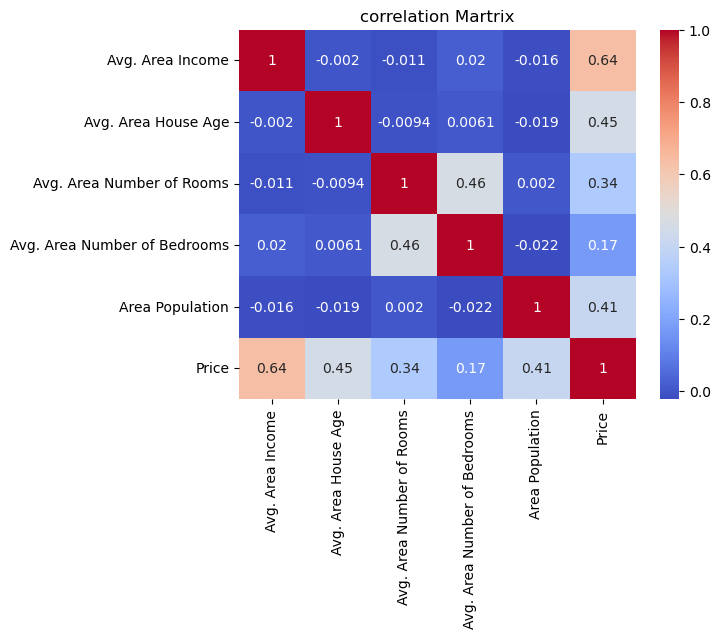

In [11]:
corr_matrix = housing_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("correlation Martrix")
plt.show()

In [14]:
X=housing_data.drop('Price', axis=1)
y=housing_data['Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
#making predictions
pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, pred)

In [23]:
r2 = r2_score(y_test, pred)

In [24]:
mse

10089009299.501492

In [25]:
r2

0.9179971706985152

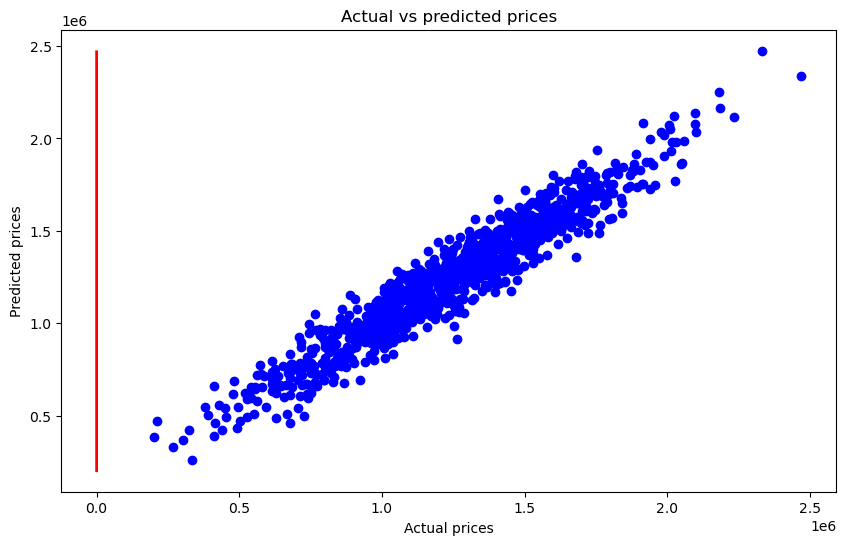

In [37]:
#visualizing the results
plt.figure(figsize=(10,6))
plt.scatter(y_test, pred, color='blue')
#create red line that serves as a reference to compare the actual and predicted values
plt.plot(min(y_test), max(y_test), [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual vs predicted prices')
plt.show()

In [39]:
#indentifying the most contributing attribute
most_correlated_attr = corr_matrix['Price'].drop("Price").idxmax()

In [40]:
most_correlated_attr

'Avg. Area Income'

In [41]:
#using most correlated attriburte for a simple linear regression
x_income = housing_data[[most_correlated_attr]]

In [44]:
x_train_income, x_test_income, y_train_income, y_test_income = train_test_split(x_income, y, test_size=0.2, random_state=42)

In [53]:
income_model = LinearRegression()
income_model.fit(x_train_income, y_train_income)

LinearRegression()

In [ ]:
#prediction

In [47]:
pred_income = income_model.predict(x_test_income)

In [57]:
mse_income = mean_squared_error(y_test_income, pred_income)
r2_income = r2_score(y_test_income, pred_income)

In [51]:
mse_income

74194887059.73972

In [58]:
r2_income

0.39694865194510154